In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def avg(list):
    return sum(list)/len(list)

In [2]:
SEPDataRaw = open("secStructCount_SEP.csv",'r').readlines()
SEPData = [item.split(",") for item in SEPDataRaw]

TPODataRaw = open("secStructCount_TPO.csv",'r').readlines()
TPOData = [item.split(",") for item in TPODataRaw]

PTRDataRaw = open("secStructCount_PTR.csv",'r').readlines()
PTRData = [item.split(",") for item in PTRDataRaw]

In [3]:
SEPResNum = [int(item[1]) for item in SEPData]
SEPHelixPerc = [int(item[2])/int(item[1]) for item in SEPData]
SEPSheetPerc = [int(item[3])/int(item[1]) for item in SEPData]
SEPCoilPerc = [int(item[4])/int(item[1]) for item in SEPData]
SEPSecStruct = [' ' in item[5] for item in SEPData]

TPOResNum = [int(item[1]) for item in TPOData]
TPOHelixPerc = [int(item[2])/int(item[1]) for item in TPOData]
TPOSheetPerc = [int(item[3])/int(item[1]) for item in TPOData]
TPOCoilPerc = [int(item[4])/int(item[1]) for item in TPOData]
TPOSecStruct = [' ' in item[5] for item in TPOData]

PTRResNum = [int(item[1]) for item in PTRData]
PTRHelixPerc = [int(item[2])/int(item[1]) for item in PTRData]
PTRSheetPerc = [int(item[3])/int(item[1]) for item in PTRData]
PTRCoilPerc = [int(item[4])/int(item[1]) for item in PTRData]
PTRSecStruct = [' ' in item[5] for item in PTRData]


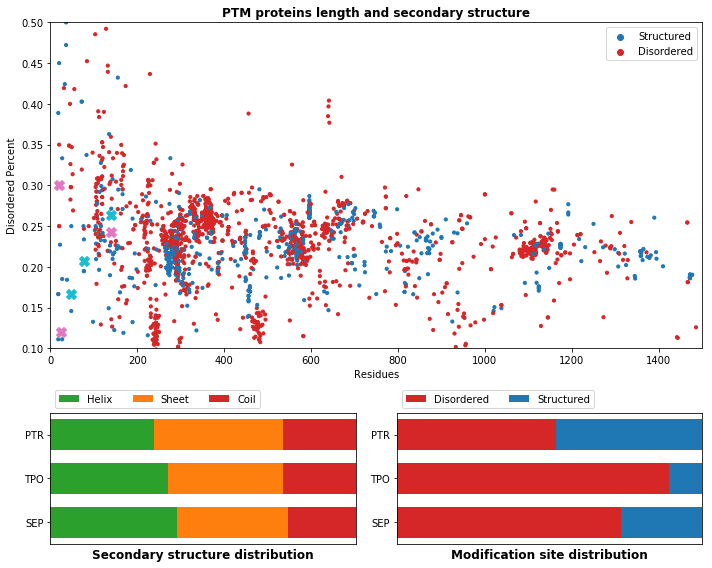

In [22]:
plt.subplots(figsize=(10,8))

plt.subplot2grid((3, 2), (0, 0),colspan=2,rowspan=2)
SEPcolor = ['tab:red' if item==True else 'tab:blue' for item in SEPSecStruct]
plt.scatter(SEPResNum,SEPCoilPerc,s=10,c=SEPcolor)

TPOcolor = ['tab:red' if item==True else 'tab:blue' for item in TPOSecStruct]
plt.scatter(TPOResNum,TPOCoilPerc,s=10,c=TPOcolor)

PTRcolor = ['tab:red' if item==True else 'tab:blue' for item in PTRSecStruct]
plt.scatter(PTRResNum,PTRCoilPerc,s=10,c=PTRcolor)

mark_sturct = plt.scatter(0,0,c='tab:blue')
mark_disord = plt.scatter(0,0,c='tab:red')


specific_x = [140,20,25]
specific_y = [34/140,6/20,3/25]
plt.scatter(specific_x,specific_y,s=100,c='tab:pink',marker='X')

specific_x_2 = [77,140,48]
specific_y_2 = [16/77,37/140,8/48]
plt.scatter(specific_x_2,specific_y_2,s=100,c='tab:cyan',marker='X')

plt.title('PTM proteins length and secondary structure',fontsize='large',fontweight='bold')
plt.xlim(0,1500)
plt.xlabel("Residues")
plt.ylim(0.1,0.5)
plt.ylabel("Disordered Percent")

plt.legend((mark_sturct,mark_disord),('Structured','Disordered'))

plt.subplot2grid((3, 2), (2, 0))

start = (0,0,0)
plt.barh((1,2,3),(avg(SEPHelixPerc),avg(TPOHelixPerc),avg(PTRHelixPerc)),left=start,height=0.7,color='tab:green',label='Helix')
start = (avg(SEPHelixPerc),avg(TPOHelixPerc),avg(PTRHelixPerc))
plt.barh((1,2,3),(avg(SEPSheetPerc),avg(TPOSheetPerc),avg(PTRSheetPerc)),left=start,height=0.7,color='tab:orange',label='Sheet')
start = (avg(SEPHelixPerc)+avg(SEPSheetPerc),avg(TPOHelixPerc)+avg(TPOSheetPerc),avg(PTRHelixPerc)+avg(PTRSheetPerc))
plt.barh((1,2,3),(avg(SEPCoilPerc),avg(TPOCoilPerc),avg(PTRCoilPerc)),left=start,height=0.7,color='tab:red',label='Coil')

plt.xlim(0,1)
plt.yticks((1,2,3),('SEP','TPO','PTR'))
plt.xticks([])
plt.xlabel('Secondary structure distribution',fontsize='large',fontweight='bold')
plt.legend(ncol=3,loc='lower left',bbox_to_anchor=(0, 1))


plt.subplot2grid((3, 2), (2, 1))

plt.barh((1,2,3),(sum(SEPSecStruct)/len(SEPSecStruct),sum(TPOSecStruct)/len(TPOSecStruct),sum(PTRSecStruct)/len(PTRSecStruct)),left=(0,0,0),height=0.7,color='tab:red',label='Disordered')
plt.barh((1,2,3),(1-sum(SEPSecStruct)/len(SEPSecStruct),1-sum(TPOSecStruct)/len(TPOSecStruct),1-sum(PTRSecStruct)/len(PTRSecStruct)),left=(sum(SEPSecStruct)/len(SEPSecStruct),sum(TPOSecStruct)/len(TPOSecStruct),sum(PTRSecStruct)/len(PTRSecStruct)),height=0.7,color='tab:blue',label='Structured')
plt.xlim(0,1)
plt.xticks([])
plt.xlabel('Modification site distribution',fontsize='large',fontweight='bold')
plt.yticks((1,2,3),('SEP','TPO','PTR'))
plt.legend(ncol=2,loc='lower left',bbox_to_anchor=(0, 1))


plt.tight_layout()

plt.savefig('SecStruct.svg')
plt.savefig('SecStruct.png',dpi=300)
plt.show()

In [5]:
print(avg(SEPHelixPerc)+avg(SEPSheetPerc)+avg(SEPSheetPerc))
print(avg(TPOHelixPerc)+avg(TPOSheetPerc)+avg(TPOSheetPerc))


1.1400636945214422
1.1387268608486827
